# 1. Import and Install Dependencies

In [ ]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
results.right_hand_landmarks

landmark {
  x: 0.11959622800350189
  y: 0.638595700263977
  z: 3.8565497106901603e-07
}
landmark {
  x: 0.1854216307401657
  y: 0.6139227747917175
  z: -0.026783522218465805
}
landmark {
  x: 0.2391946017742157
  y: 0.5548943877220154
  z: -0.03401096165180206
}
landmark {
  x: 0.27158403396606445
  y: 0.49003592133522034
  z: -0.0392860546708107
}
landmark {
  x: 0.302048921585083
  y: 0.44310224056243896
  z: -0.044054415076971054
}
landmark {
  x: 0.21578994393348694
  y: 0.4442254900932312
  z: -0.008260662667453289
}
landmark {
  x: 0.24058985710144043
  y: 0.3677617311477661
  z: -0.021808240562677383
}
landmark {
  x: 0.25203773379325867
  y: 0.31709808111190796
  z: -0.035635001957416534
}
landmark {
  x: 0.26125195622444153
  y: 0.2719734311103821
  z: -0.04632064327597618
}
landmark {
  x: 0.1809750646352768
  y: 0.4259674549102783
  z: -0.006701922044157982
}
landmark {
  x: 0.2001955211162567
  y: 0.33960533142089844
  z: -0.01825898326933384
}
landmark {
  x: 0.2112110555

In [8]:
len(results.right_hand_landmarks.landmark)

21

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [11]:
draw_landmarks(frame, results)

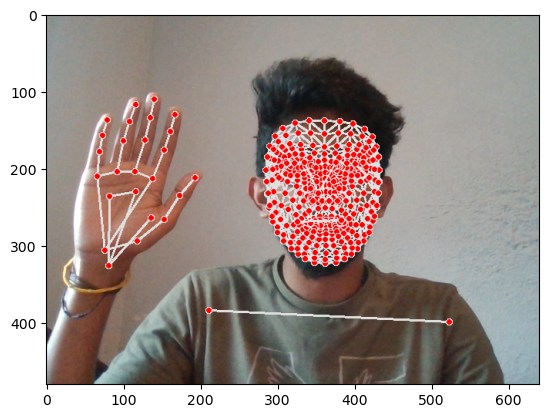

In [14]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [16]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [17]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [18]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [19]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [20]:
result_test = extract_keypoints(results)

In [21]:
result_test

array([ 0.5525049 ,  0.48336229, -0.78306186, ...,  0.12491068,
        0.28563538, -0.0422661 ])

In [22]:
468*3+33*4+21*3+21*3

1662

In [23]:
np.save('0', result_test)

In [24]:
np.load('0.npy')

array([ 0.5525049 ,  0.48336229, -0.78306186, ...,  0.12491068,
        0.28563538, -0.0422661 ])

# 4. Setup Folders for Collection

In [25]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['HI', 'Like','Thanks'])

# Forty videos worth of data
no_sequences = 40

# Videos are going to  be 30 frames in length
sequence_length = 30

In [26]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [27]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screenq
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [28]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
#=======================

# 6. Preprocess Data and Create Labels and Features

In [29]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [30]:
label_map = {label:num for num, label in enumerate(actions)}

In [31]:
label_map

{'HI': 0, 'Like': 1, 'Thanks': 2}

In [32]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [33]:
np.array(sequences).shape

(120, 30, 1662)

In [34]:
np.array(labels).shape

(120,)

In [35]:
X = np.array(sequences)

In [36]:
X.shape

(120, 30, 1662)

In [37]:
y = to_categorical(labels).astype(int)

In [38]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [127]:
y_test.shape

(48, 3)

# 7. Build and Train LSTM Neural Network

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [129]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [2]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

NameError: name 'Sequential' is not defined

In [131]:
res = [.7, 0.2, 0.1]

In [132]:
actions[np.argmax(res)]

'HI'

In [142]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [134]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - categorical_accuracy: 0.2847 - loss: 1.4056
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.2895 - loss: 31.0589
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.3945 - loss: 140.0625
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - categorical_accuracy: 0.4262 - loss: 85.4109
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.3307 - loss: 528.3190
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - categorical_accuracy: 0.3043 - loss: 255.0631
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.4240 - loss: 245.4270
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.3524 - loss: 71.2352
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.3316 - loss: 115.6124
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.4410 - loss: 118.4366
Epoch 11/2000


In [135]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 30, 64)              │         442,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

# 8. Make Predictions

In [136]:
res = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


In [137]:
actions[np.argmax(res[1])]

'Thanks'

In [138]:
actions[np.argmax(y_test[2])]

'Like'

# 9. Save Weights

In [139]:
model.save('action.h5')

In [140]:
del model

In [143]:
model.load_weights('action.h5')


# 10. Evaluation using Confusion Matrix and Accuracy

In [144]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score,f1_score

In [145]:
yhat = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 419ms/step


In [146]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [147]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[33,  2],
        [ 2, 11]],

       [[25,  4],
        [ 3, 16]],

       [[31,  1],
        [ 2, 14]]], dtype=int64)

In [148]:
accuracy_score(ytrue, yhat)

0.8541666666666666

In [1]:
f1 = f1_score(ytrue, yhat, average='macro')

print("F1 Score:", f1)

NameError: name 'f1_score' is not defined

# 11. Test in Real Time

In [91]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [93]:
# plt.figure(figsize=(18,18))
# plt.imshow(prob_viz(res, actions, image, colors))

In [94]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [95]:
cap.release()
cv2.destroyAllWindows()

In [96]:
res[np.argmax(res)] > threshold

False

In [97]:
(no_sequences,30,1662)

(40, 30, 1662)

In [98]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[0.8687355 , 0.11503797, 0.01622649]], dtype=float32)

# CNN

In [150]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard

# Define the path for TensorBoard logs
log_dir = os.path.join('CNN_Logs')
tb_callback = TensorBoard(log_dir=log_dir)

# Assuming you have X, y already defined
# If not, replace X and y with your data and labels
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define the model architecture
model = Sequential()

# Add Convolutional layers
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(30, 1662)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten the output from Convolutional layers
model.add(Flatten())

# Add Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer
# Replace 'num_classes' with the number of classes in your data
num_classes = y.shape[1]  # Assuming y is one-hot encoded
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2000, callbacks=[tb_callback])

C:\Users\PAVAN TEJA\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 246ms/step - accuracy: 0.1536 - loss: 1.1683 - val_accuracy: 0.3750 - val_loss: 1.0991
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3338 - loss: 1.1268 - val_accuracy: 0.2917 - val_loss: 1.1742
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3216 - loss: 1.1295 - val_accuracy: 0.6667 - val_loss: 1.0572
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5104 - loss: 1.0712 - val_accuracy: 0.6250 - val_loss: 1.0411
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5095 - loss: 1.0239 - val_accuracy: 0.5208 - val_loss: 1.0396
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6506 - loss: 0.9753 - val_accuracy: 0.8542 - val_loss: 0.8733
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7734 - loss: 0.8168 - val_accuracy: 0.6667 - val_loss: 0.8038
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6623 - loss: 0.6938 - val_accuracy: 0.8542 - 

In [151]:
model.save('actionCNN.h5')

In [152]:
import tensorflow as tf
from sklearn.metrics import f1_score

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Calculate F1 score
# @tf.autograph.experimental.do_not_convert
def test_function(y_true_labels, y_pred_labels):
    return f1_score(y_true_labels, y_pred_labels, average='weighted')

f1 = test_function(y_true_labels, y_pred_labels)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
print("F1 Score:", f1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9375 - loss: 0.0909
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Test Loss: 0.1095680221915245
Test Accuracy: 0.9375
F1 Score: 0.9371259371259372


In [153]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)                    │ (None, 28, 32)              │         159,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 14, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ (None, 12, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 4, 128)              │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_11 (MaxPooling1D)      │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 627,371 (2.39 MB)

 Trainable params: 209,123 (816.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 418,248 (1.60 MB)

In [103]:
res = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [104]:
actions[np.argmax(y_test[3])]

'Like'

In [179]:
cap.release()
cv2.destroyAllWindows()

# TCN

In [158]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

# Define constants
DATA_PATH = 'MP_Data'
ACTIONS = np.array(['HI', 'Like', 'Thanks'])
SEQUENCE_LENGTH = 30

# Define TCN model
class TCN(nn.Module):
    def __init__(self, input_size, output_size, num_channels=[64]*8, kernel_size=3, dropout=0.2):
        super(TCN, self).__init__()
        self.tcn = nn.Sequential(
            nn.Conv1d(input_size, num_channels[0], kernel_size=kernel_size, padding=(kernel_size - 1) // 2),
            nn.ReLU(),
            nn.Dropout(dropout)
        )
        for i in range(1, len(num_channels)):
            self.tcn.add_module(f'conv{i}', nn.Conv1d(num_channels[i-1], num_channels[i], kernel_size=kernel_size, padding=(kernel_size - 1) // 2))
            self.tcn.add_module(f'relu{i}', nn.ReLU())
            self.tcn.add_module(f'dropout{i}', nn.Dropout(dropout))
        self.linear = nn.Linear(num_channels[-1], output_size)

    def forward(self, x):
        y = self.tcn(x.permute(0, 2, 1))  # Permute to match expected input format
        y = y[:, :, -1]  # Use only the last output
        y = self.linear(y)
        return y

# Define preprocessing steps
def normalize_keypoints(keypoints):
    # Perform normalization here
    # For example: Normalize each keypoint to have zero mean and unit variance
    normalized_keypoints = keypoints
    return normalized_keypoints

def pad_or_truncate_sequence(sequence, sequence_length):
    # Perform padding or truncation here
    # For example: Pad or truncate the sequence to have a fixed length
    if len(sequence) < sequence_length:
        sequence = np.pad(sequence, ((0, sequence_length - len(sequence)), (0, 0)), mode='constant')
    elif len(sequence) > sequence_length:
        sequence = sequence[:sequence_length]
    return sequence

class ActionDataset(Dataset):
    def __init__(self, data_path, actions, sequence_length):
        self.data_path = data_path
        self.actions = actions
        self.sequence_length = sequence_length
        self.data = self.load_data()

    def load_data(self):
        data = []
        for action_idx, action in enumerate(self.actions):  # Add index to actions
            for sequence in os.listdir(os.path.join(self.data_path, action)):
                if sequence != ".DS_Store":
                    sequence_path = os.path.join(self.data_path, action, sequence)
                    frames = []
                    for frame in os.listdir(sequence_path):
                        frame_path = os.path.join(sequence_path, frame)
                        keypoints = np.load(frame_path)
                        normalized_keypoints = normalize_keypoints(keypoints)
                        padded_sequence = pad_or_truncate_sequence(normalized_keypoints, self.sequence_length)
                        frames.append(padded_sequence)
                    data.append({'action': action_idx, 'sequence': torch.tensor(frames, dtype=torch.float32)})  # Use action index
        return data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        action, sequence = sample['action'], sample['sequence']
        return {'action': action, 'sequence': sequence}

# Split data into train, validation, and test sets
def split_data(data):
    train_data, test_data = train_test_split(data, test_size=0.4, random_state=42)
    train_data, val_data = train_test_split(train_data, test_size=0.4, random_state=42)
    return train_data, val_data, test_data

# Preprocess data
dataset = ActionDataset(DATA_PATH, ACTIONS, SEQUENCE_LENGTH)
train_data, val_data, test_data = split_data(dataset.data)

# Create data loaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

# Define model parameters
input_size = 30  # Number of channels in the input sequence
output_size = len(ACTIONS)
num_channels = [64] * 8
kernel_size = 3
dropout = 0.2
num_epochs = 1000
learning_rate = 1e-3

# Initialize model, criterion, and optimizer
model = TCN(input_size, output_size, num_channels, kernel_size, dropout)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Define training function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs in train_loader:
            optimizer.zero_grad()
            sequences, labels = inputs['sequence'], inputs['action']
            outputs = model(sequences)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * sequences.size(0)

        train_loss /= len(train_loader.dataset)

        model.eval()
        val_loss = 0.0
        val_preds = []
        val_labels = []
        with torch.no_grad():  # Disable gradient computation during validation
            for inputs in val_loader:
                sequences, labels = inputs['sequence'], inputs['action']
                outputs = model(sequences)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * sequences.size(0)
                _, preds = torch.max(outputs, 1)
                val_preds.extend(preds.cpu().numpy())
                val_labels.extend(labels.cpu().numpy())

        val_loss /= len(val_loader.dataset)
        val_accuracy = accuracy_score(val_labels, val_preds)

        print(f'Epoch {epoch+1}/{num_epochs}, '
              f'Train Loss: {train_loss:.4f}, '
              f'Val Loss: {val_loss:.4f}, '
              f'Val Accuracy: {val_accuracy:.4f}')

    # Evaluate on the test set
    test_loss = 0.0
    test_preds = []
    test_labels = []
    model.eval()
    with torch.no_grad():  # Disable gradient computation during test
        for inputs in test_loader:
            sequences, labels = inputs['sequence'], inputs['action']
            outputs = model(sequences)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * sequences.size(0)
            _, preds = torch.max(outputs, 1)
            test_preds.extend(preds.cpu().numpy())
            test_labels.extend(labels.cpu().numpy())

    test_loss /= len(test_loader.dataset)
    test_accuracy = accuracy_score(test_labels, test_preds)

    print(f'Test Loss: {test_loss:.4f}, '
          f'Test Accuracy: {test_accuracy:.4f}')

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs)


Epoch 1/1000, Train Loss: 1.0990, Val Loss: 1.0970, Val Accuracy: 0.4138
Epoch 2/1000, Train Loss: 1.0999, Val Loss: 1.0990, Val Accuracy: 0.4138
Epoch 3/1000, Train Loss: 1.0970, Val Loss: 1.1012, Val Accuracy: 0.4138
Epoch 4/1000, Train Loss: 1.0992, Val Loss: 1.1027, Val Accuracy: 0.4138
Epoch 5/1000, Train Loss: 1.0961, Val Loss: 1.1041, Val Accuracy: 0.4138
Epoch 6/1000, Train Loss: 1.0987, Val Loss: 1.1053, Val Accuracy: 0.4138
Epoch 7/1000, Train Loss: 1.0991, Val Loss: 1.1068, Val Accuracy: 0.2069
Epoch 8/1000, Train Loss: 1.0948, Val Loss: 1.1085, Val Accuracy: 0.2069
Epoch 9/1000, Train Loss: 1.0970, Val Loss: 1.1110, Val Accuracy: 0.2069
Epoch 10/1000, Train Loss: 1.0980, Val Loss: 1.1151, Val Accuracy: 0.2069
Epoch 11/1000, Train Loss: 1.0946, Val Loss: 1.1182, Val Accuracy: 0.2069
Epoch 12/1000, Train Loss: 1.0934, Val Loss: 1.1222, Val Accuracy: 0.2069
Epoch 13/1000, Train Loss: 1.0910, Val Loss: 1.1281, Val Accuracy: 0.2069
Epoch 14/1000, Train Loss: 1.0915, Val Loss: 1.

In [159]:
from sklearn.metrics import f1_score

# After the model training in the previous code block...

# Evaluate on the test set for F1 Score
test_preds = []
test_labels = []
model.eval()
with torch.no_grad():  # Disable gradient computation during test
    for inputs in test_loader:
        sequences, labels = inputs['sequence'], inputs['action']
        outputs = model(sequences)
        _, preds = torch.max(outputs, 1)
        test_preds.extend(preds.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

test_accuracy = accuracy_score(test_labels, test_preds)
test_f1 = f1_score(test_labels, test_preds, average='weighted')

print(f'Final Test Accuracy: {test_accuracy:.4f}, '
      f'Final Test F1 Score: {test_f1:.4f}')


Final Test Accuracy: 0.8750, Final Test F1 Score: 0.8732
